<a href="https://colab.research.google.com/github/gh10gh/a/blob/main/A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

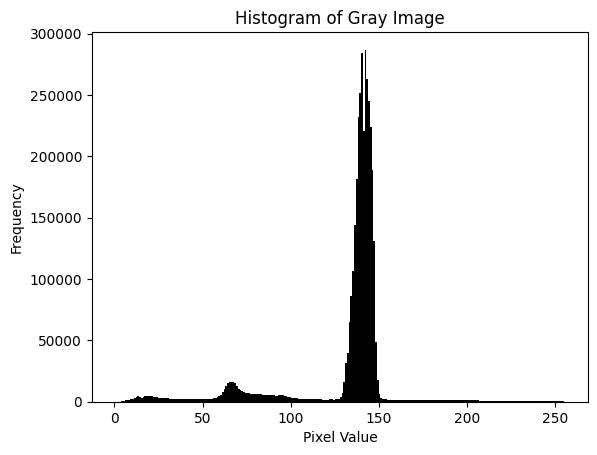

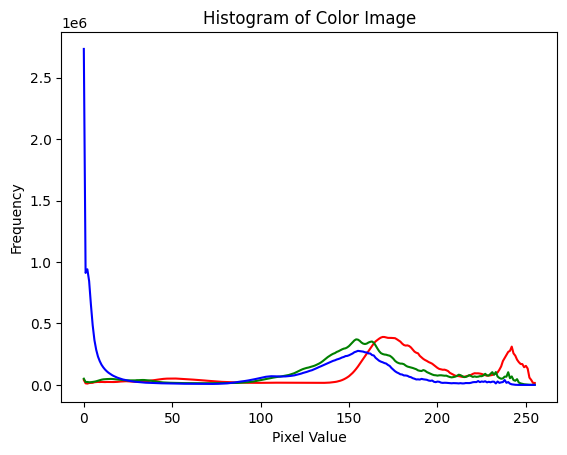

In [7]:
# 1. Write a Python program to implement the following:
# i) Histogram of a gray image and a color image


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Plot histogram for grayscale and color images
def plot_histogram(image, title):
    plt.figure()
    if len(image.shape) == 2:  # Grayscale image
        plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    else:  # Color image
        colors = ('r', 'g', 'b')
        for i, col in enumerate(colors):
            hist, _ = np.histogram(image[:, :, i], bins=256, range=[0, 256])
            plt.plot(hist, color=col)
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

# Load images - Make sure to replace with your actual image paths
gray_image = np.array(Image.open('example.jpg').convert('L'))
color_image = np.array(Image.open('example2.jpg'))

# Plot histograms
plot_histogram(gray_image, 'Histogram of Gray Image')
plot_histogram(color_image, 'Histogram of Color Image')

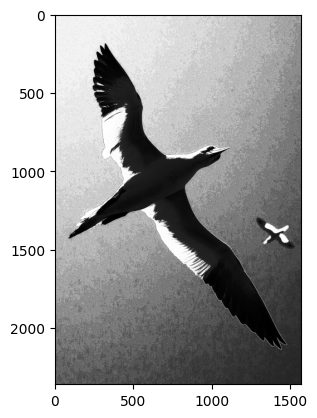

In [8]:
# ii) Histogram Equalization (logic)

def histogram_equalization(image):
    if len(image.shape) == 2:  # Grayscale image
        hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
        cdf = hist.cumsum()
        cdf_normalized = cdf / cdf[-1]  # Normalize the CDF
        equalized_image = np.interp(image.flatten(), np.arange(0, 256), cdf_normalized * 255)
        return equalized_image.reshape(image.shape).astype(np.uint8)
    else:  # Color image - we'll handle this later
        return image

# Apply histogram equalization
equalized_gray_image = histogram_equalization(gray_image)

# Display results
plt.imshow(equalized_gray_image, cmap='gray')

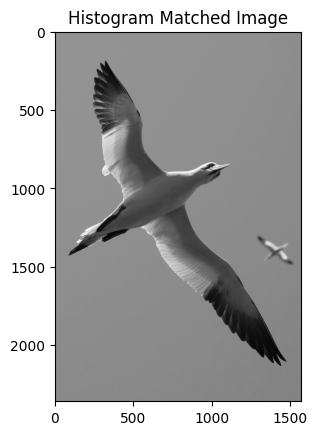

In [11]:
# iii) Histogram Matching

from skimage import exposure

def histogram_matching(source, template):
    matched = exposure.match_histograms(source, template, channel_axis=None)
    return matched

# Load source and reference images
reference_image = np.array(Image.open('example.jpg').convert('L'))  # Load a different reference image

# Apply histogram matching
matched_image = histogram_matching(gray_image, reference_image)

# Display results
plt.imshow(matched_image, cmap='gray')
plt.title('Histogram Matched Image')
plt.show()

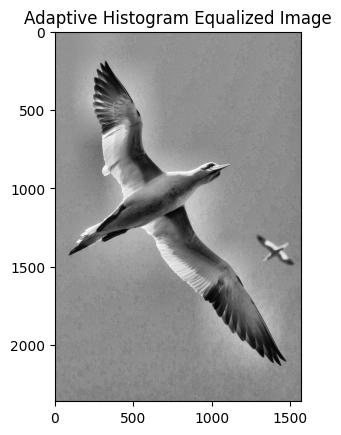

In [12]:
# iv) Adaptive Histogram Equalization

from skimage import exposure
def adaptive_histogram_equalization(image): return exposure.equalize_adapthist(image, clip_limit=0.03)
# Apply adaptive histogram equalization
adaptive_equalized_image = adaptive_histogram_equalization(gray_image)
# Display results
plt.imshow(adaptive_equalized_image, cmap='gray')
plt.title('Adaptive Histogram Equalized Image')
plt.show()

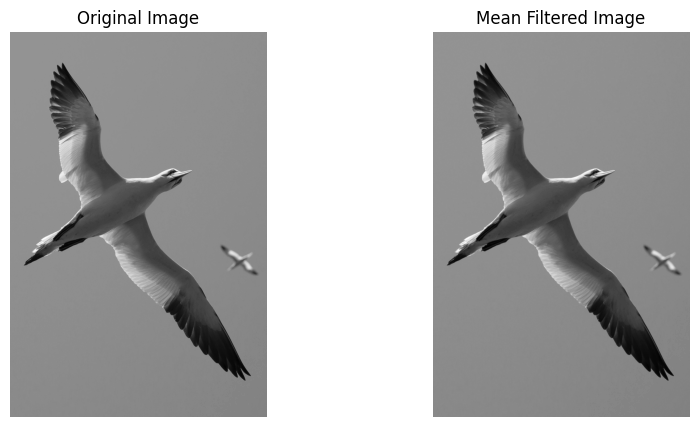

In [13]:
# Given a noisy image and write the program using Python for image filtering:
# i) Image filtering: (reduction: salt-pepper)
# a) Mean filter

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter
from PIL import Image

def apply_mean_filter(image_path='example.jpg', size=3):
    """Applies a mean filter to an image and displays the results."""
    image = np.array(Image.open(image_path).convert('L'))
    filtered_image = uniform_filter(image, size=size)

    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Mean Filtered Image'), plt.axis('off')
    plt.show()

# Run the mean filter example
apply_mean_filter('example.jpg')

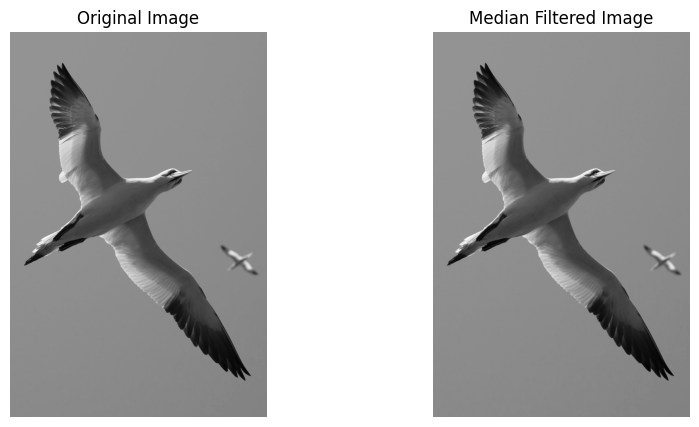

In [15]:
# b) Median filter

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from PIL import Image

def apply_median_filter(image_path='example.jpg', size=3):
  """Applies a median filter to an image and displays the results."""
  image = np.array(Image.open(image_path).convert('L'))
  filtered_image = median_filter(image, size=size)

  plt.figure(figsize=(10, 5))
  plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
  plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Median Filtered Image'), plt.axis('off')
  plt.show()

# Run the median filter example
apply_median_filter('example.jpg')

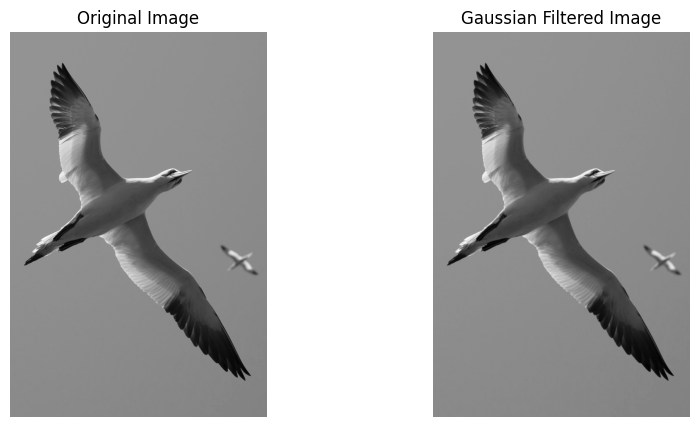

In [16]:
# c) Gaussian filter (logic)

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from PIL import Image

def apply_gaussian_filter(image_path='example.jpg', sigma=1):
    """Applies a Gaussian filter to an image and displays the results."""
    image = np.array(Image.open(image_path).convert('L'))
    filtered_image = gaussian_filter(image, sigma=sigma)

    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Gaussian Filtered Image'), plt.axis('off')
    plt.show()

# Run the Gaussian filter example
apply_gaussian_filter('example.jpg')

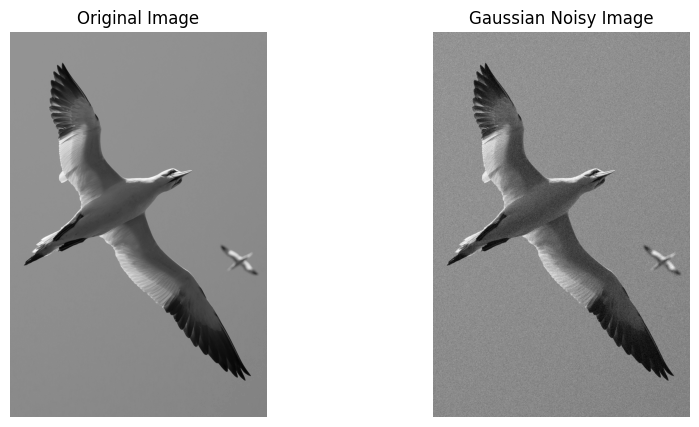

In [17]:
# ii) Noise:
# a) Gaussian noise

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def apply_gaussian_noise(image_path='example.jpg', mean=0, std=25):
    """Adds Gaussian noise to an image and displays the results."""
    image = np.array(Image.open(image_path).convert('L'))
    noisy_image = image + np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Gaussian Noisy Image'), plt.axis('off')
    plt.show()

# Run the example
apply_gaussian_noise('example.jpg')

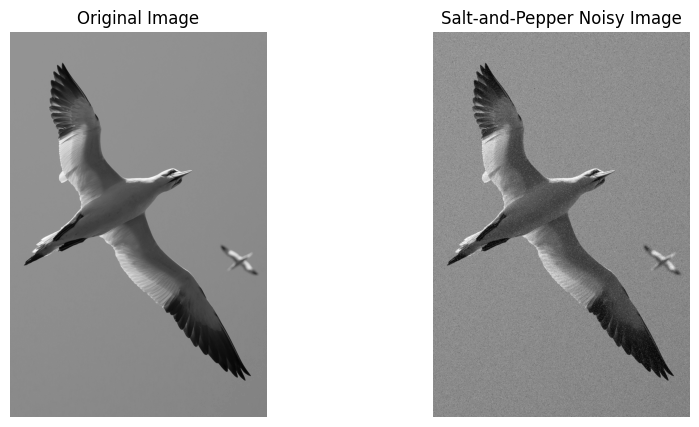

In [18]:
# b) salt-and-pepper noise

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def apply_salt_and_pepper_noise(image_path='example.jpg', prob=0.05):
    """Adds salt-and-pepper noise to an image and displays the results."""
    image = np.array(Image.open(image_path).convert('L'))
    noisy_image = np.copy(image)

    # Salt (white pixels)
    num_salt = int(prob * image.size * 0.5)
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy_image[tuple(coords)] = 255

    # Pepper (black pixels)
    num_pepper = int(prob * image.size * 0.5)
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy_image[tuple(coords)] = 0

    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Salt-and-Pepper Noisy Image'), plt.axis('off')
    plt.show()

# Run the example
apply_salt_and_pepper_noise('example.jpg')

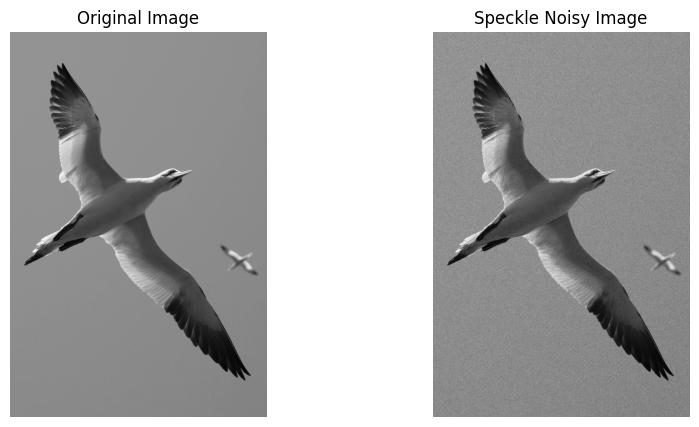

In [19]:
# c) speckle noise

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def apply_speckle_noise(image_path='example.jpg', mean=0, std=0.2):
    """Adds speckle noise to an image and displays the results."""
    image = np.array(Image.open(image_path).convert('L'))
    noisy_image = image + image * np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(noisy_image, cmap='gray'), plt.title('Speckle Noisy Image'), plt.axis('off')
    plt.show()

# Run the example
apply_speckle_noise('example.jpg')

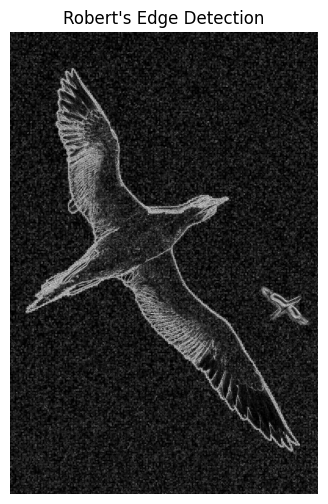

In [21]:
# 3. Given a gray value image and write the program of the following tasks:
# i) Using different masks find the edges of the image:
# a) Robert’s operator (logic)

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

def roberts_edge_detection(image_path='example.jpg'):

    image = np.array(Image.open(image_path).convert('L'))

    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    gx = convolve(image, kernel_x)
    gy = convolve(image, kernel_y)

    edge_image = np.sqrt(gx**2 + gy**2)
    edge_image = np.clip(edge_image, 0, 255).astype(np.uint8)  # Clip and convert to uint8

    plt.figure(figsize=(6, 6))
    plt.imshow(edge_image, cmap='gray')
    plt.title("Robert's Edge Detection")
    plt.axis('off')
    plt.show()

# Run the example
roberts_edge_detection('example.jpg')

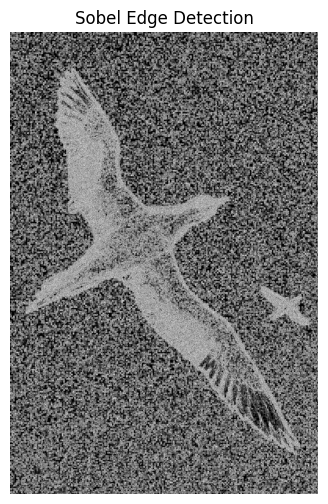

In [22]:
# b) Sobel operator (logic)

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

def sobel_edge_detection(image_path='example.jpg'):
    """Applies Sobel operator for edge detection and displays the result."""
    image = np.array(Image.open(image_path).convert('L'))

    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    gx = convolve(image, kernel_x)
    gy = convolve(image, kernel_y)

    edge_image = np.sqrt(gx**2 + gy**2)
    edge_image = np.clip(edge_image, 0, 255).astype(np.uint8)

    plt.figure(figsize=(6, 6))
    plt.imshow(edge_image, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis('off')
    plt.show()

# Run the example
sobel_edge_detection('example.jpg')

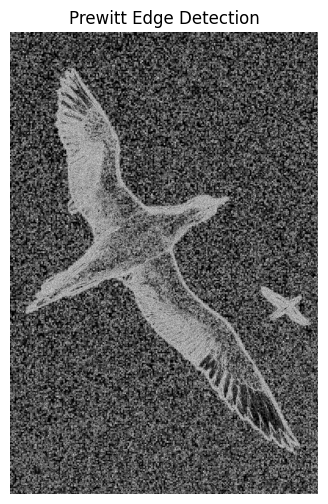

In [23]:
# c) Prewitt operator (logic)

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

def prewitt_edge_detection(image_path='example.jpg'):
    """Applies Prewitt operator for edge detection and displays the result."""
    image = np.array(Image.open(image_path).convert('L'))

    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    gx = convolve(image, kernel_x)
    gy = convolve(image, kernel_y)

    edge_image = np.sqrt(gx**2 + gy**2)
    edge_image = np.clip(edge_image, 0, 255).astype(np.uint8)

    plt.figure(figsize=(6, 6))
    plt.imshow(edge_image, cmap='gray')
    plt.title("Prewitt Edge Detection")
    plt.axis('off')
    plt.show()

# Run the example
prewitt_edge_detection('example.jpg')

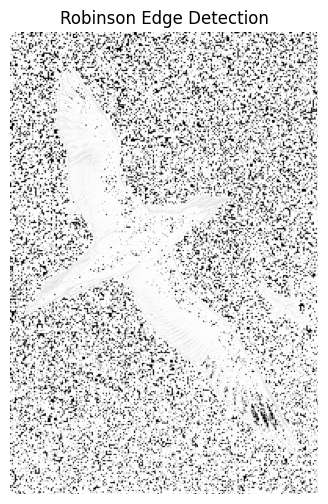

In [24]:
# d) Robinson operator

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

def robinson_edge_detection(image_path='example.jpg'):
    """Applies Robinson operator for edge detection and displays the result."""
    image = np.array(Image.open(image_path).convert('L'))

    kernels = [
        np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
        np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]]),
        np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
        np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]]),
        np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
        np.array([[0, -1, -2], [1, 0, -1], [2, 1, 0]]),
        np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]),
        np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]])
    ]

    edge_images = [np.abs(convolve(image, kernel)) for kernel in kernels]  # Use abs for gradient magnitude
    edge_image = np.max(edge_images, axis=0).astype(np.uint8)

    plt.figure(figsize=(6, 6))
    plt.imshow(edge_image, cmap='gray')
    plt.title("Robinson Edge Detection")
    plt.axis('off')
    plt.show()

# Run the example
robinson_edge_detection('example.jpg')

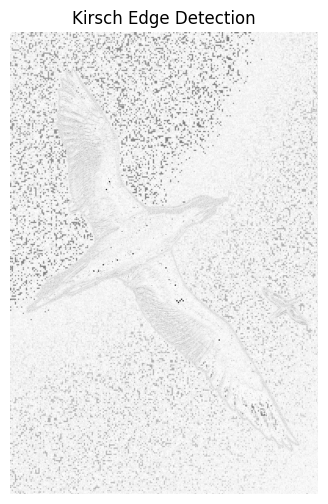

In [25]:
# e) Kirsch operator

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

def kirsch_edge_detection(image_path='example.jpg'):
    """Applies Kirsch operator for edge detection and displays the result."""
    image = np.array(Image.open(image_path).convert('L'))

    kernels = [
        np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
        np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),
        np.array([[-3, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
        np.array([[-3, 5, 5], [-3, 0, 5], [-3,-3,-3]]),
        np.array([[-3,-3,-3], [5, 0, 5], [5, 5, 5]]),
        np.array([[-3,-3,-3], [-3, 0, 5], [5, 5, 5]]),
        np.array([[-3,-3,-3], [-3, 0,-3], [5, 5, 5]]),
        np.array([[-3,-3,-3], [5, 0, 5], [5, 5, 5]])
    ]

    edge_images = [np.abs(convolve(image, kernel)) for kernel in kernels]  # Use abs for gradient magnitude
    edge_image = np.max(edge_images, axis=0).astype(np.uint8)

    plt.figure(figsize=(6, 6))
    plt.imshow(edge_image, cmap='gray')
    plt.title("Kirsch Edge Detection")
    plt.axis('off')
    plt.show()

# Run the example
kirsch_edge_detection('example.jpg')

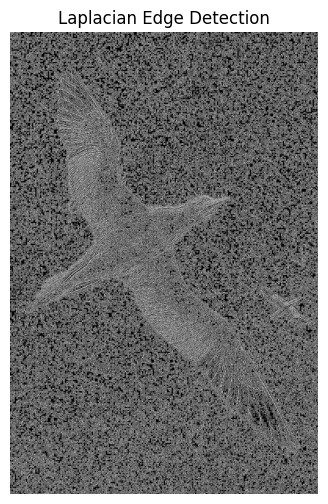

In [26]:
#  f) Laplacian operator

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

def laplacian_edge_detection(image_path='example.jpg'):
    """Applies Laplacian operator for edge detection and displays the result."""
    image = np.array(Image.open(image_path).convert('L'))

    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    edge_image = convolve(image, kernel)
    edge_image = np.clip(edge_image, 0, 255).astype(np.uint8)

    plt.figure(figsize=(6, 6))
    plt.imshow(edge_image, cmap='gray')
    plt.title("Laplacian Edge Detection")
    plt.axis('off')
    plt.show()

# Run the example
laplacian_edge_detection('example.jpg')